**Problem statement 1: Use decision trees to prepare a model on fraud data treating those who have taxable_income <= 30000 as "Risky" and others are "Good"**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [2]:
from google.colab import files
uploaded=files.upload()

Saving Fraud_check.csv to Fraud_check.csv


In [3]:
fraud =pd.read_csv("Fraud_check.csv")
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
# we have to convert yes and no data to the 1 and 0 from 1st and last column and also from the marital status column
# add one more column to this as risk having yes or no or zero or one using the <=30000 as given in problem

In [4]:
fraud.rename(columns={'Undergrad':'undergrad','Marital.Status':'maritalstatus','Taxable.Income':'taxableincome','City.Population':'citypop','Work.Experience':'workexp'},inplace=True)

In [5]:
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [6]:
fraud.undergrad.replace(('NO','YES'),(0,1),inplace=True)
fraud.Urban.replace(('NO','YES'),(0,1),inplace=True)
fraud.maritalstatus.replace(('Single','Married','Divorced'),(0,1,2),inplace=True)

In [7]:
fraud.isna().sum()

undergrad        0
maritalstatus    0
taxableincome    0
citypop          0
workexp          0
Urban            0
dtype: int64

In [8]:
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban
0,0,0,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,2,76340,39492,7,1
596,1,2,69967,55369,2,1
597,0,2,47334,154058,0,1
598,1,1,98592,180083,17,0


In [9]:
l1=[]
for i in list(fraud.taxableincome):
    if i <30000:
        l1.append('Risky')
    elif i==30000:
        l1.append('Risky')
    else:
        l1.append('Good')

In [10]:
fraud['Risk']=pd.DataFrame(l1)
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban,Risk
0,0,0,68833,50047,10,1,Good
1,1,2,33700,134075,18,1,Good
2,0,1,36925,160205,30,1,Good
3,1,0,50190,193264,15,1,Good
4,0,1,81002,27533,28,0,Good
...,...,...,...,...,...,...,...
595,1,2,76340,39492,7,1,Good
596,1,2,69967,55369,2,1,Good
597,0,2,47334,154058,0,1,Good
598,1,1,98592,180083,17,0,Good


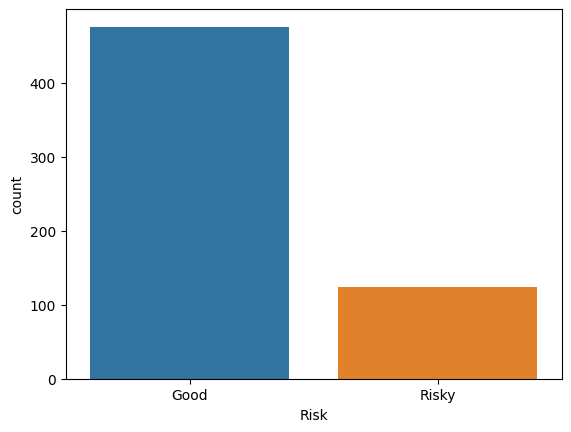

Good     476
Risky    124
Name: Risk, dtype: int64

In [12]:
import seaborn as sns
sns.countplot(x='Risk',data=fraud)
plt.xlabel('Risk')
plt.ylabel('count')
plt.show()
fraud['Risk'].value_counts()

In [13]:
le=preprocessing.LabelEncoder()
fraud['Risk'] = le.fit_transform(fraud.Risk)

In [14]:
fraud

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban,Risk
0,0,0,68833,50047,10,1,0
1,1,2,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,0,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
...,...,...,...,...,...,...,...
595,1,2,76340,39492,7,1,0
596,1,2,69967,55369,2,1,0
597,0,2,47334,154058,0,1,0
598,1,1,98592,180083,17,0,0


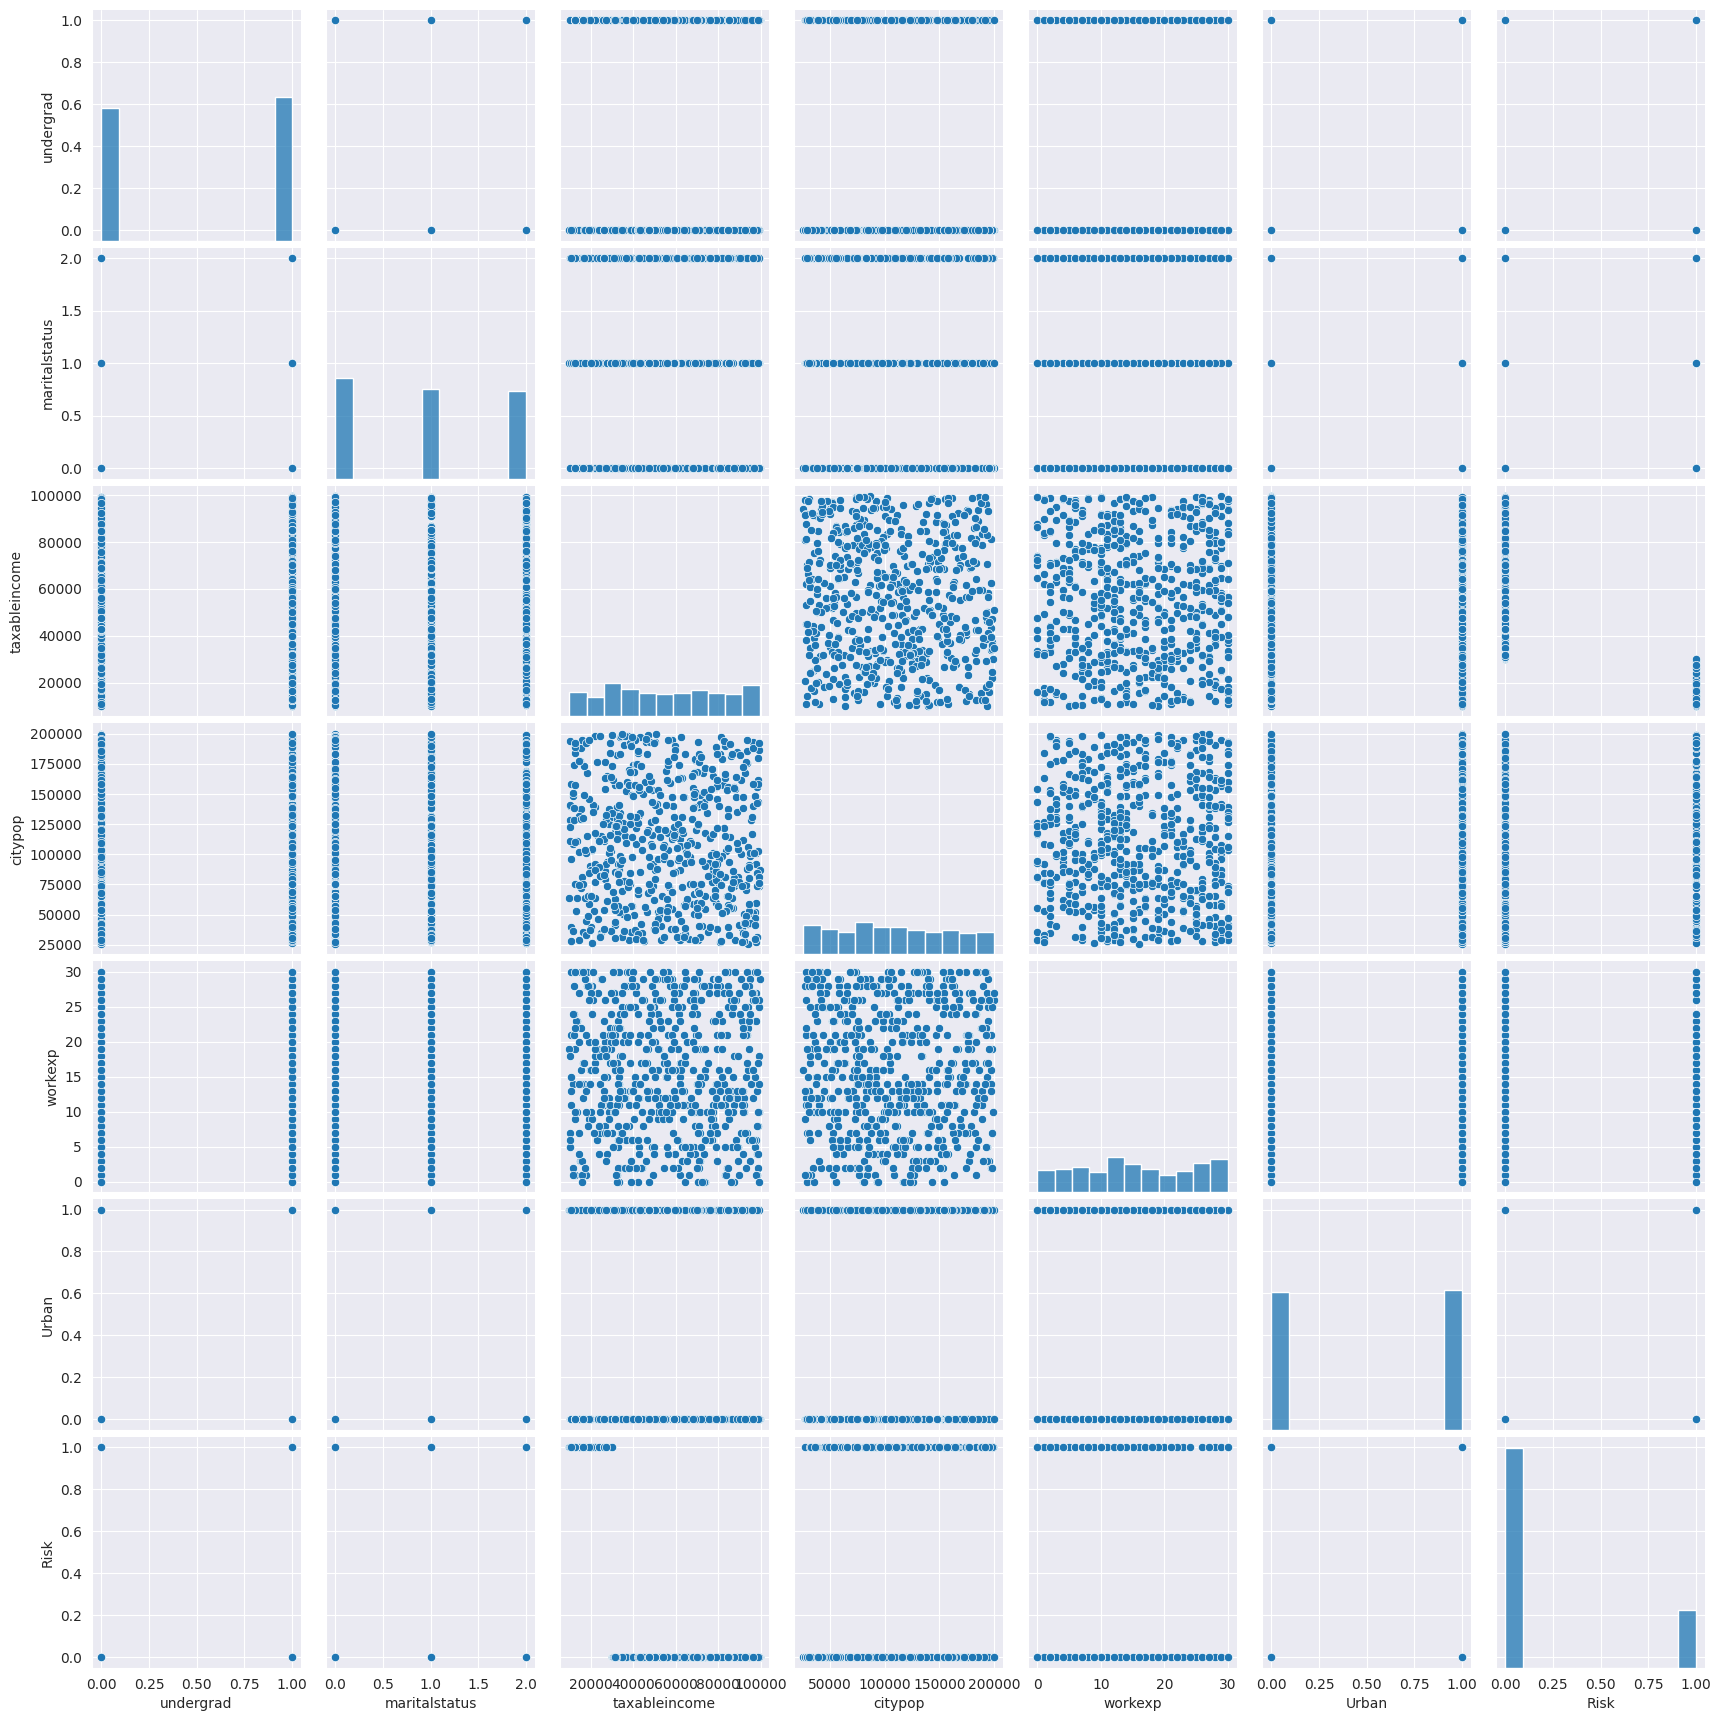

In [15]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(fraud)

In [16]:
fraud.Risk.value_counts()

0    476
1    124
Name: Risk, dtype: int64

In [17]:
x=fraud.iloc[0::,0:6:1]
x

,undergrad,maritalstatus,taxableincome,citypop,workexp,Urban
0,0,0,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,2,76340,39492,7,1
596,1,2,69967,55369,2,1
597,0,2,47334,154058,0,1
598,1,1,98592,180083,17,0


In [18]:
y=fraud.iloc[0::,6:7:]
y

,Risk
0,0
1,0
2,0
3,0
4,0
...,...
595,0
596,0
597,0
598,0


In [19]:
xtrain,xtest,ytrain,ytest= train_test_split(x,y,test_size=0.2)

In [20]:
ytest

,Risk
261,0
218,0
425,0
26,0
343,0
...,...
329,1
557,1
106,1
500,0


In [21]:
fraudmodel = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=5)
fraudmodel1 = fraudmodel.fit(xtrain,ytrain)

[Text(0.5, 0.75, 'taxableincome <= 30041.5\ngini = 0.32\nsamples = 480\nvalue = [384, 96]\nclass = Risky'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 96\nvalue = [0, 96]\nclass = Good'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 384\nvalue = [384, 0]\nclass = Risky')]

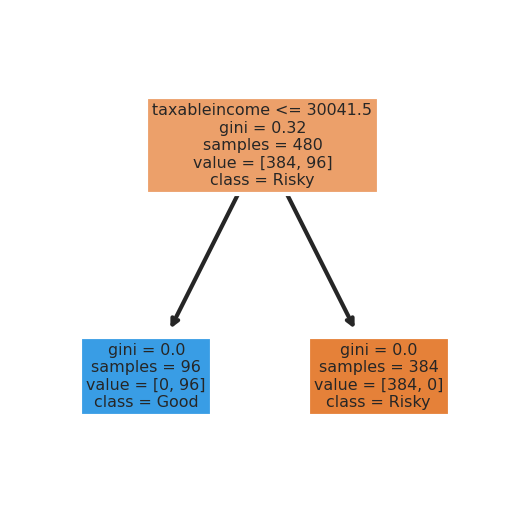

In [22]:
fn=['undergrad','maritalstatus','taxableincome','citypop','workexp','Urban']
cn=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(fraudmodel1,feature_names=fn,class_names=cn,filled=True)

In [23]:
ypreds = fraudmodel1.predict(xtest)

In [24]:
metrics.accuracy_score(ytest,ypreds)

1.0

In [ ]:
# So our model is 100% accurate on the test data

In [25]:
#Since we are given task of computing only based on taxable income so making tree seperately for taxable income vs risk column
x2=fraud.iloc[0::,2:3:]
x2

,taxableincome
0,68833
1,33700
2,36925
3,50190
4,81002
...,...
595,76340
596,69967
597,47334
598,98592


In [26]:
xtrain2,xtest2,ytrain2,ytest2= train_test_split(x2,y,test_size=0.2)

In [27]:
xtrain2

,taxableincome
221,43051
556,42063
16,24987
499,93339
330,95185
...,...
115,79357
320,78922
294,98933
207,12083


In [28]:
fraudmodel2 = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=5)
fraudmodel22 = fraudmodel2.fit(xtrain2,ytrain2)

[Text(0.5, 0.75, 'taxableincome <= 30055.5\ngini = 0.327\nsamples = 480\nvalue = [381, 99]\nclass = Risky'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 99\nvalue = [0, 99]\nclass = Good'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 381\nvalue = [381, 0]\nclass = Risky')]

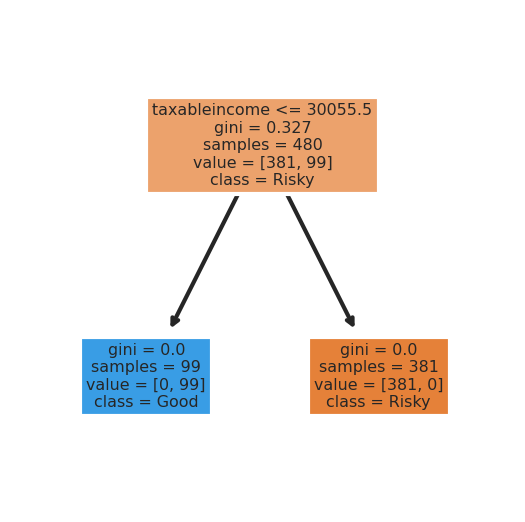

In [29]:
fn2=['taxableincome']
cn2=['Risky','Good']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (2,2), dpi=300)
tree.plot_tree(fraudmodel22,feature_names=fn2,class_names=cn2,filled=True)

In [30]:
ypreds2= fraudmodel22.predict(xtest2)

In [31]:
metrics.accuracy_score(ytest2,ypreds2)

1.0

In [ ]:
# So this model is also giving accuracy of 100% so we can use any model either fraudmodel1 or fraudmodel22

 **Problem Statement 2: A cloth manufacturing company is interested to know about the segment or attributes causes high sale. Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.**

In [ ]:
# so here Sales is y variable and all other are x variable and we have to find variable which causes high sales

In [32]:
from google.colab import files
uploaded=files.upload()

Saving Company_Data.csv to Company_Data.csv


In [33]:
company= pd.read_csv("Company_Data.csv")
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [34]:
company.Urban.value_counts()

Yes    282
No     118
Name: Urban, dtype: int64

In [35]:
company.ShelveLoc.replace(('Bad','Medium','Good'),(0,1,2),inplace=True)
company.Urban.replace(('No','Yes'),(0,1),inplace=True)
company.US.replace(('No','Yes'),(0,1),inplace=True)

In [36]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,2,33,14,1,1
396,6.14,139,23,3,37,120,1,55,11,0,1
397,7.41,162,26,12,368,159,1,40,18,1,1
398,5.94,100,79,7,284,95,0,50,12,1,1


In [ ]:
# Sales need to be in the categorical variable and how to convert this into two category i.e high and low

In [ ]:
# First categories the sales into two groups i.e. high and low based on less than 10 and greater than 10
# make it the seperate new column added to our data and delete old column

In [37]:
l5=[]
for i in list(company.Sales):
    if i <10:
        l5.append('low')
    elif i==10:
        l5.append('high')
    else:
        l5.append('high')

In [38]:
company['Sales']=pd.DataFrame(l5)
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,low,138,73,11,276,120,0,42,17,1,1
1,high,111,48,16,260,83,2,65,10,1,1
2,high,113,35,10,269,80,1,59,12,1,1
3,low,117,100,4,466,97,1,55,14,1,1
4,low,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,2,33,14,1,1
396,low,139,23,3,37,120,1,55,11,0,1
397,low,162,26,12,368,159,1,40,18,1,1
398,low,100,79,7,284,95,0,50,12,1,1


In [39]:
company.Sales.value_counts()

low     321
high     79
Name: Sales, dtype: int64

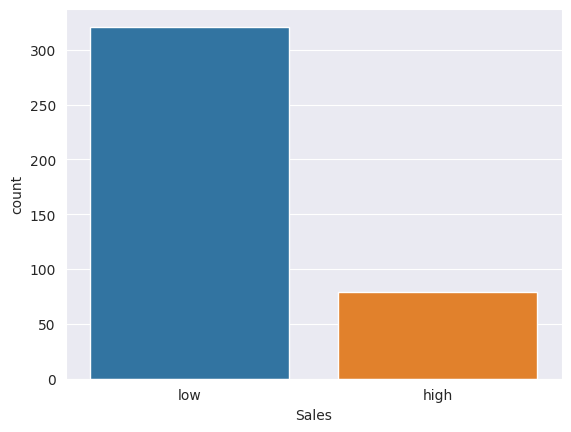

low     321
high     79
Name: Sales, dtype: int64

In [40]:
sns.countplot(x='Sales',data=company)
plt.xlabel('Sales')
plt.ylabel('count')
plt.show()
company['Sales'].value_counts()

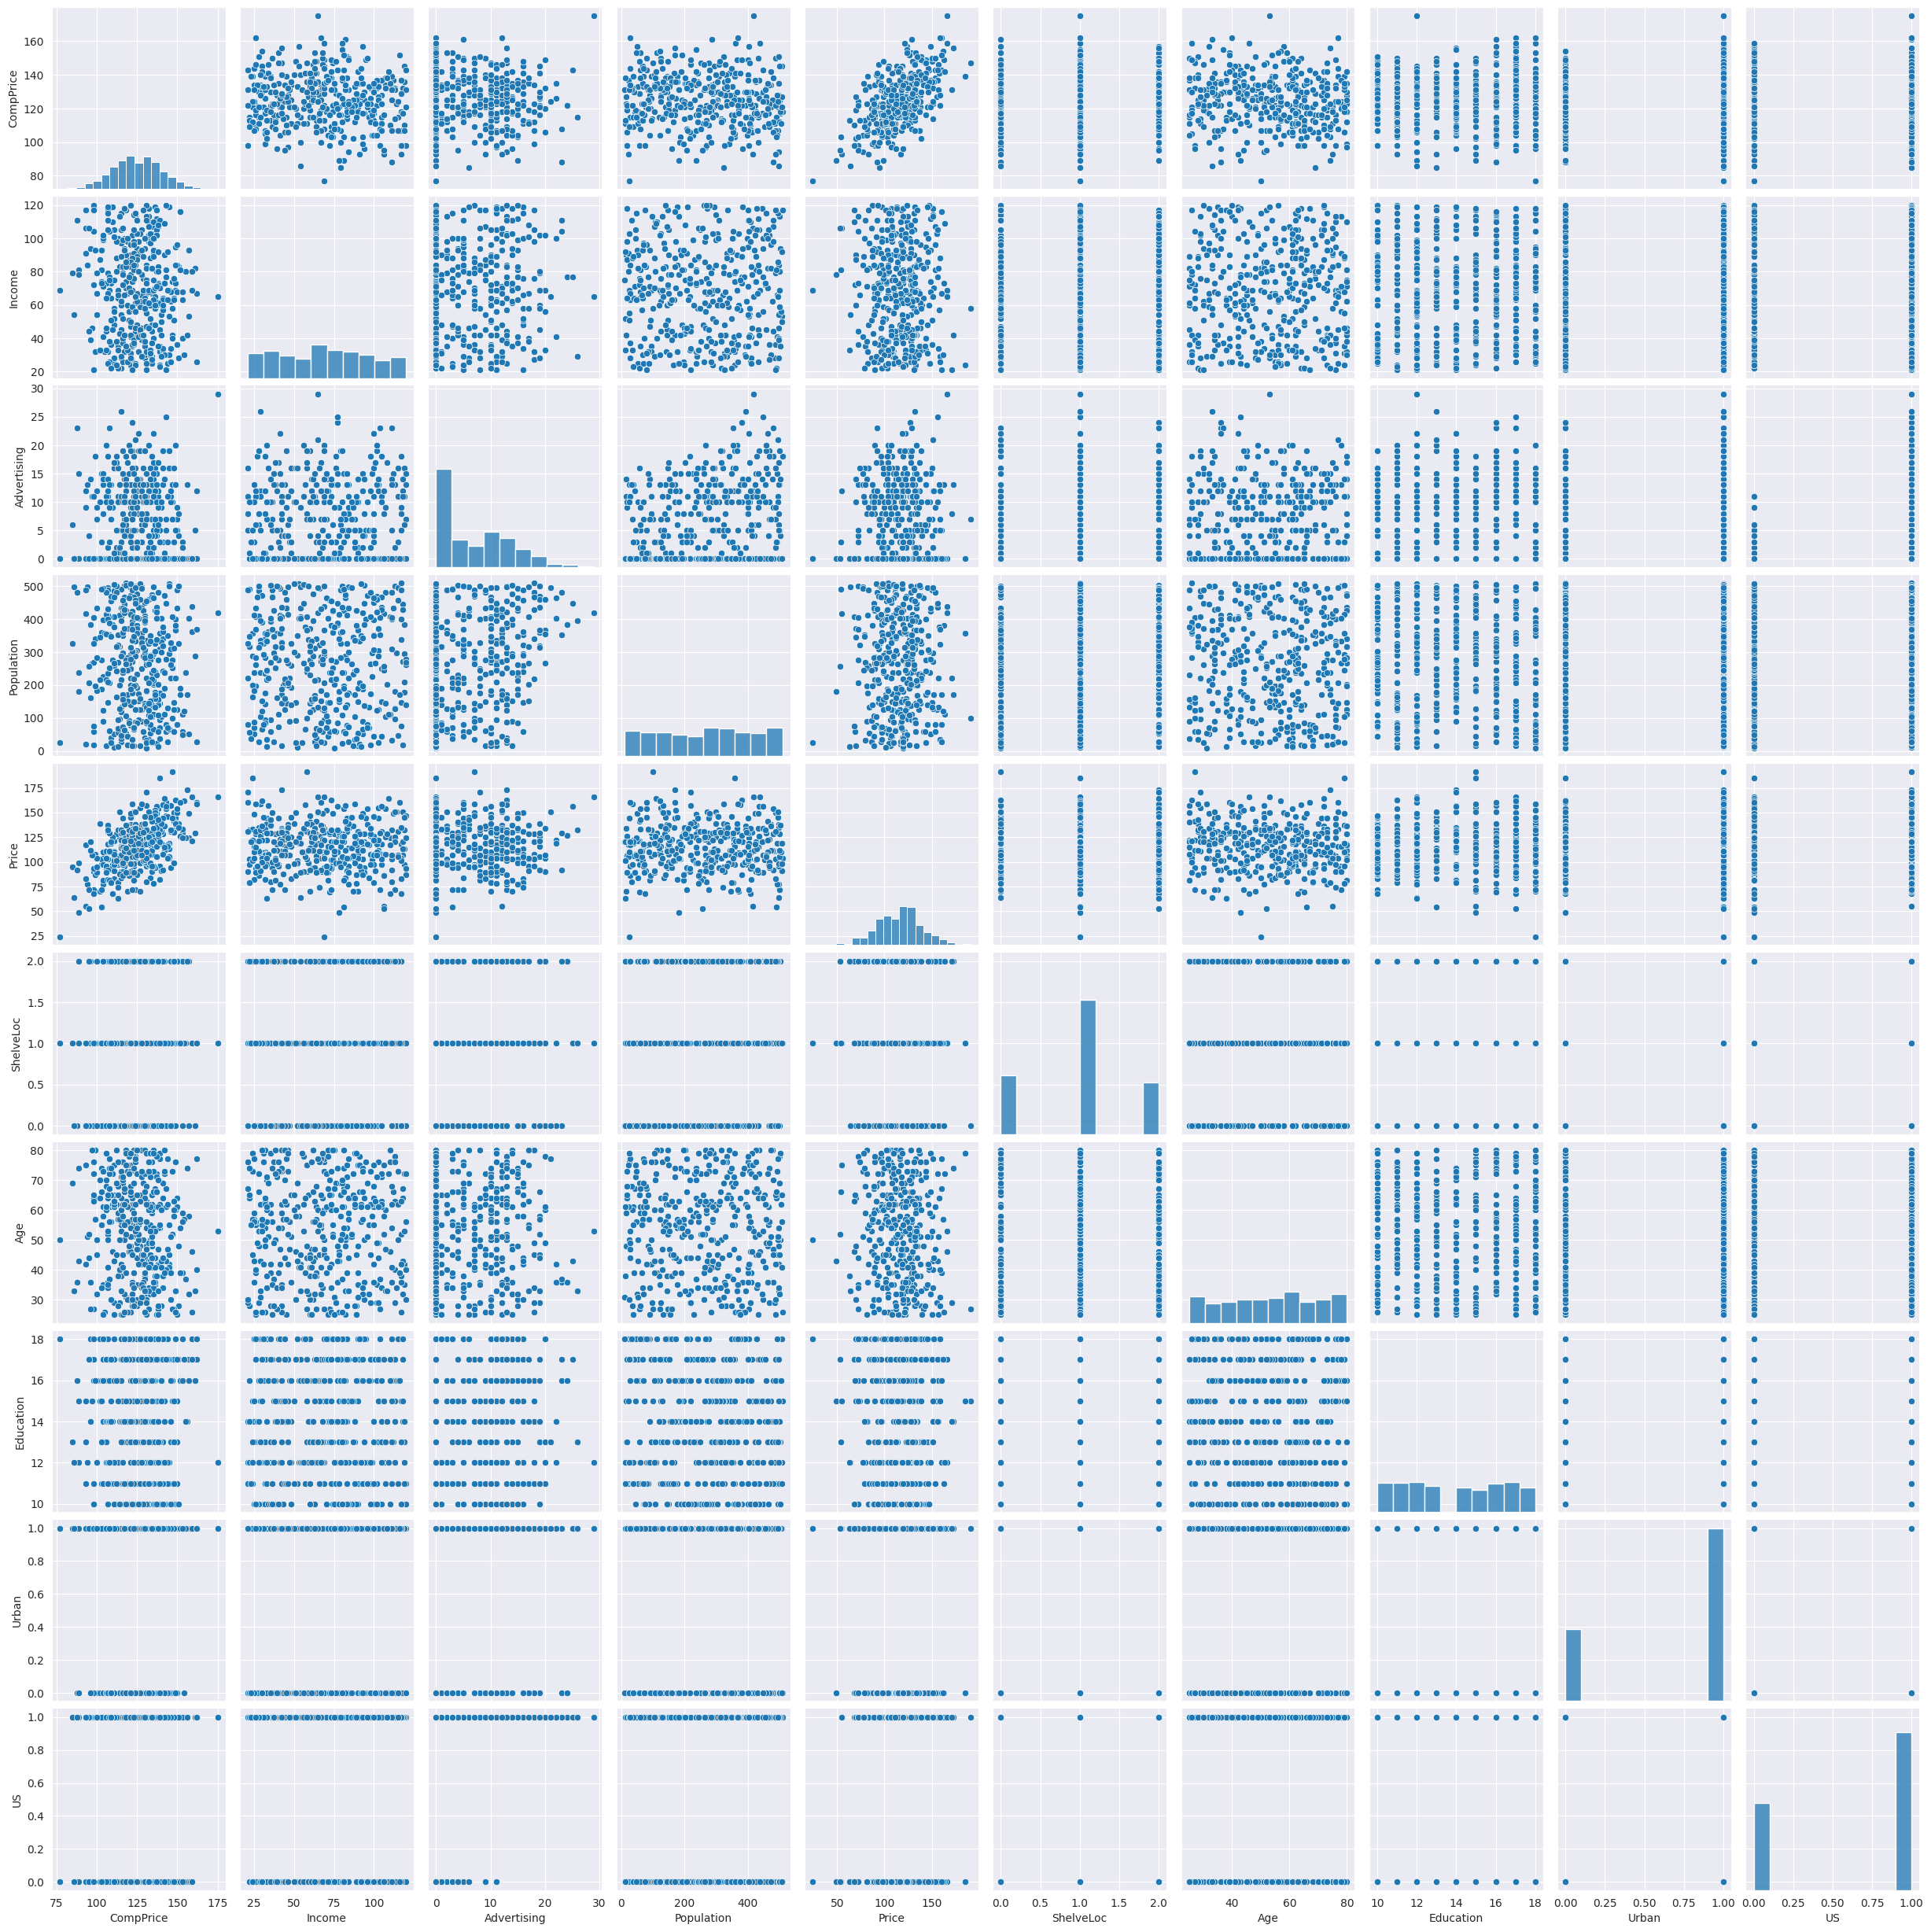

In [41]:
import seaborn as sns
sns.set_style(style='darkgrid')
sns.pairplot(company)

In [42]:
x= company.iloc[0::,1:11:]
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,2,65,10,1,1
2,113,35,10,269,80,1,59,12,1,1
3,117,100,4,466,97,1,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,2,33,14,1,1
396,139,23,3,37,120,1,55,11,0,1
397,162,26,12,368,159,1,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [43]:
y= company.iloc[0::,0:1:]
y

,Sales
0,low
1,high
2,high
3,low
4,low
...,...
395,high
396,low
397,low
398,low


In [44]:
xtrain,xtest,ytrain,ytest =train_test_split(x,y,test_size=0.2)

In [45]:
xtrain

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
139,146,62,10,310,94,1,30,13,0,1
3,117,100,4,466,97,1,55,14,1,1
368,109,22,10,348,79,2,74,14,0,1
30,125,94,0,447,89,2,30,12,1,0
201,138,83,0,139,134,1,54,18,1,0
...,...,...,...,...,...,...,...,...,...,...
55,143,81,5,60,154,1,61,18,1,1
59,118,71,4,148,114,1,80,13,1,0
228,149,73,13,381,163,0,26,11,0,1
383,98,117,0,76,68,1,63,10,1,0


In [46]:
companymodel = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=5)
companymodel1 = companymodel.fit(xtrain,ytrain)

[Text(0.5555555555555556, 0.9444444444444444, 'ShelveLoc <= 1.5\ngini = 0.312\nsamples = 320\nvalue = [62, 258]\nclass = high'),
 Text(0.3194444444444444, 0.8333333333333334, 'Price <= 88.0\ngini = 0.172\nsamples = 252\nvalue = [24, 228]\nclass = high'),
 Text(0.1388888888888889, 0.7222222222222222, 'Advertising <= 9.5\ngini = 0.493\nsamples = 25\nvalue = [11, 14]\nclass = high'),
 Text(0.05555555555555555, 0.6111111111111112, 'Population <= 65.0\ngini = 0.375\nsamples = 16\nvalue = [4, 12]\nclass = high'),
 Text(0.027777777777777776, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]\nclass = low'),
 Text(0.08333333333333333, 0.5, 'Age <= 28.5\ngini = 0.245\nsamples = 14\nvalue = [2, 12]\nclass = high'),
 Text(0.05555555555555555, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = low'),
 Text(0.1111111111111111, 0.3888888888888889, 'Price <= 85.0\ngini = 0.142\nsamples = 13\nvalue = [1, 12]\nclass = high'),
 Text(0.08333333333333333, 0.2777777777777778, 'gini = 0.0\nsam

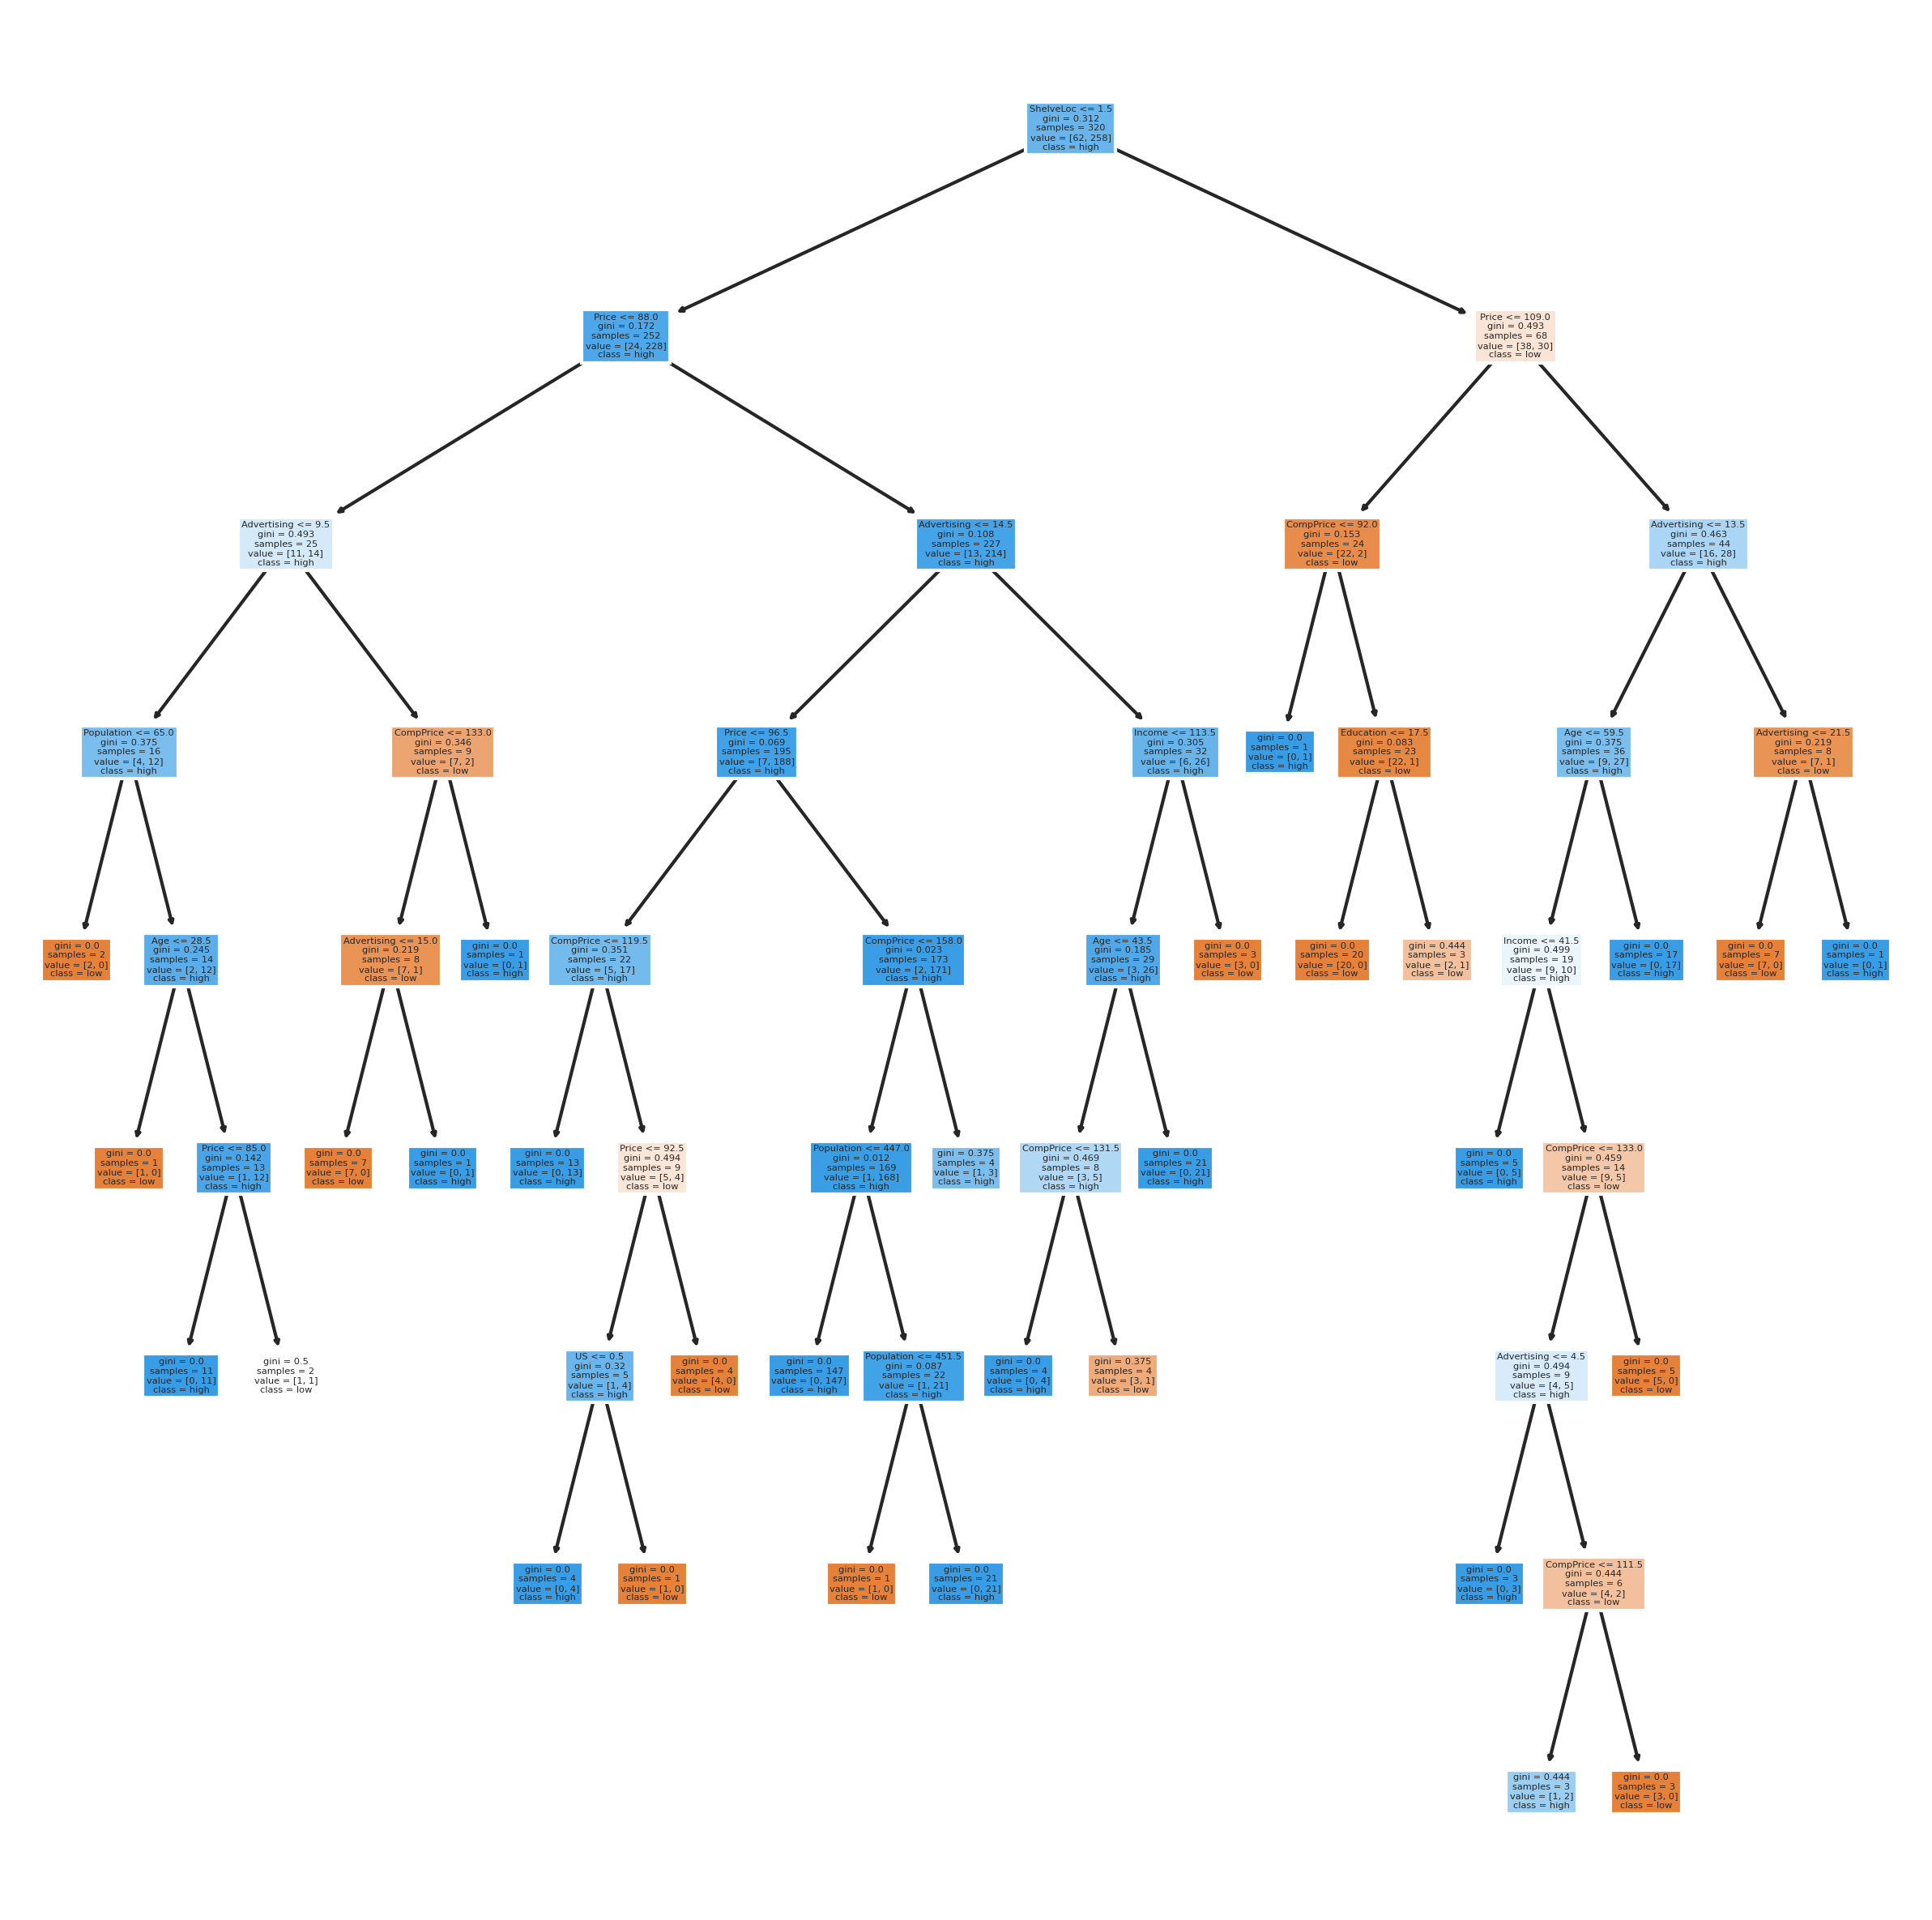

In [47]:
fn=['CompPrice', 'Income','Advertising','Population', 'Price','ShelveLoc','Age','Education','Urban','US']
cn=['low','high']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (10,10), dpi=300)
tree.plot_tree(companymodel1,feature_names=fn,class_names=cn,filled=True)

In [48]:
ypredcomp= companymodel1.predict(xtest)

In [49]:
metrics.accuracy_score(ytest,ypredcomp)

0.8375

In [ ]:
#So our model for company sales has 83.75% accuracy